In [1]:

from Bio import SeqIO
from Bio.Seq import Seq
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets

In [2]:
my_Seq = Seq("AGTACACTGGTA")
print(my_Seq)
print("complement:", my_Seq.complement())
print("reverse complement:", my_Seq.reverse_complement())


AGTACACTGGTA
complement: TCATGTGACCAT
reverse complement: TACCAGTGTACT


In [3]:
mrna=my_Seq.transcribe()
print("mRNA", mrna)

protien=mrna.translate()
print("protien", protien)

mRNA AGUACACUGGUA
protien STLV


In [4]:
#Reading Fasta file
print("Reading Fasta file")
for record in SeqIO.parse("rcsb_pdb_1BOM.fasta", "fasta"):
    print("ID: ", record.id)
    print("Sequence: ", record.seq)
    print("Description: ", record.description)




Reading Fasta file
ID:  1BOM_1|Chain
Sequence:  GIVDECCLRPCSVDVLLSYC
Description:  1BOM_1|Chain A|BOMBYXIN-II,BOMBYXIN A-2|Bombyx mori (7091)
ID:  1BOM_2|Chain
Sequence:  QQPQAVHTYCGRHLARTLADLCWEAGVD
Description:  1BOM_2|Chain B|BOMBYXIN-II,BOMBYXIN A-6|Bombyx mori (7091)


In [5]:
# Writing a Fasta file
output_record = SeqIO.SeqRecord(my_Seq, id="Test_Seq", description="This is a test sequence")
SeqIO.write(output_record, "output.fasta", "fasta")
print("fasta file written as output.fasta")

fasta file written as output.fasta


In [6]:
# Working with GenBank Files
# Reading a GenBank file
print("\nReading sequences from a GenBank file:")
for record in SeqIO.parse("sequence.gb", "genbank"):
    print("ID:", record.id)
    print("Sequence:", record.seq)
    print("Description:", record.description)


Reading sequences from a GenBank file:
ID: L15440.1
Sequence: CTGCCAGCACTGCCTGTCTGAGGAGCCTGAGATTCGGGCCTTCGACCCTGAGGCTGCGGCCGTGCAGCCCTACCAAGACCAGACGTACCAGTCAGTCTACTTCGTGTCTGAGAGCTTCAGTGACGCCAAGGACAAGCTCAGGTGGGCTAGGCTGCTAGGGCAAGCCCCCCATGGTGCCCCCAAACTGGGCCAGCCAGGCCTTCCTTCTGGCCTTGAGCAGGGCTGGACCTGTGAGCCCAGGTCACAGATGAGAAAACCGACCCCTGGTTGCAGCAGCCCCCACACAGCAGGGACACCATCCGTGAGAAGGACTCCAGCGTCTGGGAGGGGCAGACCTACAGGACTGGGGCTGCTGGGTGGCCGGGTCAAGGCCAGTCTTGGAGGTGCTGACAGAGCCTGAGCTTTGTGAGGACGTCCTGTGGAACCTGTCCCGGCCCCCTGCCCTGGGATGGGGAGAAGTCAGGGGGATAGACAGAGTCAAGGTGGGGGACAGGGCGGGAGTGGGGTCCCCAGGGCTGGGGGCCTTTGGTGCAGTGACCAGAGTGTCAGGAGAGGGGAGCAAAGCCCTCTAGCCTCATCCTCATAAAAGGTCTCATCATTTTCCCTCCAGCCTCTTATGCACTGGGAAACTGAGGCCAGGGGCTATGTTGCCAGCGGACAGGGGTGCTGAATTCCACCCACAGGCTTAGGGATATGGTCAAGGAAAGCTTCCTGGAGGAGGCCCAGTGGAGGTTCAGGGAGGGATGGGGTGCCCGGCAGTCTCTAGTGGAAAAGGCGCCTAGCCTATCTCCCCCATGAACCCCCTCACCCAGCCCTGGAAGAGGCCTCAGTGTCCCGCCTGTGACCAGTTGGCTCAGAAAAGCCCTGGGAGCTCTGAGCCACTGTGAAGGTGGAAACGCGGCCCCTGGCCTCCCCTCTCCTGGAGGCTGCAGACTCT

In [9]:
from Bio.SeqUtils import gc_fraction
gc_content = gc_fraction(my_Seq) * 100
print(f"\nGC Content of the sequence {my_Seq} is: {gc_content:.2f}%")


GC Content of the sequence AGTACACTGGTA is: 41.67%


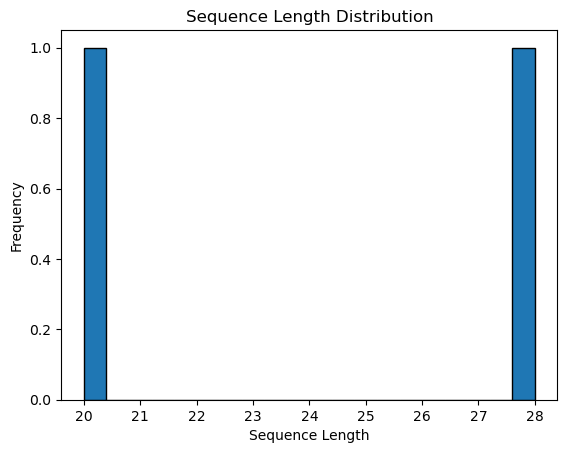

In [8]:
# Visualization Example
# Plotting Sequence Length Distribution
def plot_sequence_lengths(file_path, file_format):
    lengths = [len(record.seq) for record in SeqIO.parse(file_path, file_format)]
    plt.hist(lengths, bins=20, edgecolor='black')
    plt.title('Sequence Length Distribution')
    plt.xlabel('Sequence Length')
    plt.ylabel('Frequency')
    plt.show()

# Provide a file path and format to plot the sequence length distribution
plot_sequence_lengths('rcsb_pdb_1BOM.fasta', 'fasta')

In [10]:
print("\nExercises:")
print("1. Create a DNA sequence and find its GC content.")
print("2. Write a function to count the occurrence of each nucleotide in a given DNA sequence.")
print("3. Read a FASTA file and find the longest sequence in the file.")

# Solutions
print("\nSolutions:")
print("1. GC content function:")
def gc_content(sequence):
    return (gc_fraction(Seq(sequence)) * 100)
print("GC content of 'AGTACACTGGT':", gc_content("AGTACACTGGT"))

print("\n2. Nucleotide count function:")
def nucleotide_count(sequence):
    return {nucleotide: sequence.count(nucleotide) for nucleotide in 'ACGT'}
print("Nucleotide count of 'AGTACACTGGT':", nucleotide_count("AGTACACTGGT"))

print("\n3. Find longest sequence in FASTA file:")
def find_longest_sequence(file_path, file_format):
    sequences = list(SeqIO.parse(file_path, file_format))
    longest_seq = max(sequences, key=lambda record: len(record.seq))
    return longest_seq.id, len(longest_seq.seq)
print("Longest sequence in 'example.fasta':", find_longest_sequence('rcsb_pdb_1BOM.fasta', 'fasta'))


Exercises:
1. Create a DNA sequence and find its GC content.
2. Write a function to count the occurrence of each nucleotide in a given DNA sequence.
3. Read a FASTA file and find the longest sequence in the file.

Solutions:
1. GC content function:
GC content of 'AGTACACTGGT': 45.45454545454545

2. Nucleotide count function:
Nucleotide count of 'AGTACACTGGT': {'A': 3, 'C': 2, 'G': 3, 'T': 3}

3. Find longest sequence in FASTA file:
Longest sequence in 'example.fasta': ('1BOM_2|Chain', 28)
